In [1]:
import pandas as pd
import swifter
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', -1)
pd.set_option('display.max_colwidth', -1)
import warnings; warnings.simplefilter('ignore')


In [2]:
train = pd.read_csv("/data/semeval-2020/task-7/task-1/train.csv")
dev = pd.read_csv("/data/semeval-2020/task-7/task-1/dev.csv")

In [3]:
train.head(100) 

,id,original,edit,grades,meanGrade
0,14530,France is ‘ hunting down its citizens who joined <Isis/> ’ without trial in Iraq,twins,10000,0.2
1,13034,"Pentagon claims 2,000 % increase in Russian trolls after <Syria/> strikes . What does that mean ?",bowling,33110,1.6
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor Crashes <Coalition/>,party,22100,1.0
3,76,"In an apparent first , Iran and Israel <engage/> each other militarily",slap,20000,0.4
4,6164,Trump was told weeks ago that Flynn misled <Vice/> President .,school,0,0.0
5,8832,"All 22 <promises/> Trump made in his speech to Congress , in one chart",sounds,22200,1.2
6,12174,New DOJ alert system will flag <crimes/> against police,laughter,32100,1.2
7,3731,"As Someone Who Grew Up Among Fundamentalist <Christians/> In The US , I 'm Surprised Anyone 's Surprised About Roy Moore",morons,21110,1.0
8,6554,"Canadians may pay more taxes than Americans , but here 's what they get for their <money/>",loonies,10000,0.2
9,14191,Dutch minister resigns in drug baron <row/>,blow,0,0.0


In [4]:
dev.head(5)

,id,original,edit
0,1723,Thousands of gay and bisexual <men/> convicted of long-abolished sexual offences are posthumously pardoned,swans
1,12736,Special <prosecutor/> appointed to Trump Russia,chef
2,12274,Spanish police detain man and search Ripoll addresses in hunt for terror <suspects/>,squad
3,8823,N.Y. Times <reprimands/> reporter for sharing ' unfounded rumor ' about Melania Trump,applauds
4,5087,Vladimir Putin Releases Video Simulation Of Russian <Missile/> striking Florida conveniently right on top of USSOCOM headquarters at MacDill AFB .,balloon


In [5]:
train["grade_round"] = train["meanGrade"].apply(lambda x:round(x))

In [6]:
train["grade_round"].value_counts()

1    5380
0    2557
2    1662
3    53  
Name: grade_round, dtype: int64

In [7]:
from functools import partial 
def get_grade(position,grades):
    s_grades = str(grades)
    if len(s_grades) > 1:
        return int(s_grades[position])
    return 0

In [8]:
train["grades_0"]  = train["grades"].apply(partial(get_grade,0))
train["grades_1"]  = train["grades"].apply(partial(get_grade,1))
train["grades_2"]  = train["grades"].apply(partial(get_grade,2))
train["grades_3"]  = train["grades"].apply(partial(get_grade,3))
train["grades_4"]  = train["grades"].apply(partial(get_grade,4))

In [9]:
train.head(4)

,id,original,edit,grades,meanGrade,grade_round,grades_0,grades_1,grades_2,grades_3,grades_4
0,14530,France is ‘ hunting down its citizens who joined <Isis/> ’ without trial in Iraq,twins,10000,0.2,0,1,0,0,0,0
1,13034,"Pentagon claims 2,000 % increase in Russian trolls after <Syria/> strikes . What does that mean ?",bowling,33110,1.6,2,3,3,1,1,0
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor Crashes <Coalition/>,party,22100,1.0,1,2,2,1,0,0
3,76,"In an apparent first , Iran and Israel <engage/> each other militarily",slap,20000,0.4,0,2,0,0,0,0


In [10]:
train["grades_0"].value_counts().sort_index()

0    523 
1    2296
2    3657
3    3176
Name: grades_0, dtype: int64

In [11]:
train["grades_1"].value_counts().sort_index()

0    1896
1    3816
2    3071
3    869 
Name: grades_1, dtype: int64

In [12]:
train["grades_2"].value_counts().sort_index()

0    3744
1    4030
2    1669
3    209 
Name: grades_2, dtype: int64

In [13]:
train["grades_3"].value_counts().sort_index()

0    6082
1    2875
2    652 
3    43  
Name: grades_3, dtype: int64

In [14]:
train["grades_4"].value_counts().sort_index()

0    8194
1    1286
2    159 
3    13  
Name: grades_4, dtype: int64

In [15]:
import re
def prepare_edited_new_headline(row):
    original_head_line = row.original
    edit = row.edit
    return re.sub(r'<.*/>', edit, original_head_line)

In [16]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

def get_original_headline(headline):
    return headline.replace("<","").replace("/>","")

def remove_stop_words(headline):
    my_doc = nlp(headline)
    token_list = []
    for token in my_doc:
        if token.text not in ['‘',"'"]:
            token_list.append(token.text.lower())

    return replaceContraction(" ".join(token_list))

text = """France is ‘ hunting down its citizens who joined Isis ’ without trial in Iraq"""



In [17]:
train["edited_head_line"]= train.swifter.apply(prepare_edited_new_headline,axis=1)\
            .swifter.apply(remove_stop_words)\
            .swifter.apply(replaceContraction)

dev["edited_head_line"]= dev.swifter.apply(prepare_edited_new_headline,axis=1)\
            .swifter.apply(remove_stop_words)\
            .swifter.apply(replaceContraction)


In [18]:
train["original_cleaned"] = train["original"].swifter.apply(get_original_headline)\
        .swifter.apply(remove_stop_words)\
        .swifter.apply(replaceContraction)
        
dev["original_cleaned"] = dev["original"].swifter.apply(get_original_headline)\
        .swifter.apply(remove_stop_words)\
        .swifter.apply(replaceContraction)


In [19]:
train.head(5)

,id,original,edit,grades,meanGrade,grade_round,grades_0,grades_1,grades_2,grades_3,grades_4,edited_head_line,original_cleaned
0,14530,France is ‘ hunting down its citizens who joined <Isis/> ’ without trial in Iraq,twins,10000,0.2,0,1,0,0,0,0,france is hunting down its citizens who joined twins ’ without trial in iraq,france is hunting down its citizens who joined isis ’ without trial in iraq
1,13034,"Pentagon claims 2,000 % increase in Russian trolls after <Syria/> strikes . What does that mean ?",bowling,33110,1.6,2,3,3,1,1,0,"pentagon claims 2,000 % increase in russian trolls after bowling strikes . what does that mean ?","pentagon claims 2,000 % increase in russian trolls after syria strikes . what does that mean ?"
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor Crashes <Coalition/>,party,22100,1.0,1,2,2,1,0,0,iceland pm calls snap vote as pedophile furor crashes party,iceland pm calls snap vote as pedophile furor crashes coalition
3,76,"In an apparent first , Iran and Israel <engage/> each other militarily",slap,20000,0.4,0,2,0,0,0,0,"in an apparent first , iran and israel slap each other militarily","in an apparent first , iran and israel engage each other militarily"
4,6164,Trump was told weeks ago that Flynn misled <Vice/> President .,school,0,0.0,0,0,0,0,0,0,trump was told weeks ago that flynn misled school president .,trump was told weeks ago that flynn misled vice president .


In [20]:
original_headlines_train = train["original"].swifter.apply(get_original_headline)
original_headlines_dev = dev["original"].swifter.apply(get_original_headline)
edited_headlines_train = train["edited_head_line"]
edited_headlines_dev = train["edited_head_line"]

In [21]:
train.to_csv("ready_to_serve_train.csv",index=False)
dev.to_csv("ready_to_serve_dev.csv",index=False)

In [22]:
original_headlines_train.append(original_headlines_dev).to_csv("original_headlines.csv",index=False,header=True)
edited_headlines_train.append(edited_headlines_dev).to_csv("edited_headlines.csv",index=False,header=True)

In [23]:
from fastai.text import *

In [24]:
# data_lm = TextLMDataBunch.from_csv(".","edited_headlines.csv",bs=128,text_cols="edited_head_line")

In [25]:
data_lm = TextLMDataBunch.from_csv(".","ready_to_serve_train.csv",bs=128,text_cols=["edited_head_line","original_cleaned"])

In [26]:
data_lm.batch_size

128

In [33]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5).to_fp16()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-01
Min loss divided by 10: 6.31E-02


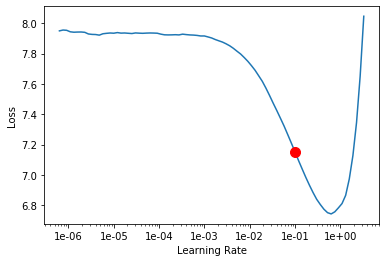

In [34]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [35]:
learn.fit_one_cycle(70, 1e-1)


epoch,train_loss,valid_loss,accuracy,time
0,7.023380,6.007627,0.146224,00:01
1,6.176589,5.172778,0.202790,00:01
2,5.491412,4.523970,0.267280,00:01
3,4.839899,3.878821,0.343471,00:01
4,4.198269,3.302280,0.426618,00:01
5,3.594998,2.834533,0.500651,00:01
6,3.099947,2.546833,0.553999,00:01
7,2.680948,2.366264,0.588002,00:01
8,2.368676,2.281158,0.607887,00:01
9,2.152583,2.255109,0.616778,00:01


In [30]:
# learn.unfreeze()
# learn.fit_one_cycle(16, 1e-3)

In [36]:
learn.save("edited_original_lm")

In [37]:
learn.save_encoder('ft_enc')


In [38]:
train["original_plus_edited"] = train.swifter.apply(lambda x: x.original_cleaned + x.edited_head_line,axis=1)

In [39]:
dev["original_plus_edited"] = dev.swifter.apply(lambda x: x.original_cleaned + x.edited_head_line,axis=1)

In [40]:
train.head(3)

,id,original,edit,grades,meanGrade,grade_round,grades_0,grades_1,grades_2,grades_3,grades_4,edited_head_line,original_cleaned,original_plus_edited
0,14530,France is ‘ hunting down its citizens who joined <Isis/> ’ without trial in Iraq,twins,10000,0.2,0,1,0,0,0,0,france is hunting down its citizens who joined twins ’ without trial in iraq,france is hunting down its citizens who joined isis ’ without trial in iraq,france is hunting down its citizens who joined isis ’ without trial in iraqfrance is hunting down its citizens who joined twins ’ without trial in iraq
1,13034,"Pentagon claims 2,000 % increase in Russian trolls after <Syria/> strikes . What does that mean ?",bowling,33110,1.6,2,3,3,1,1,0,"pentagon claims 2,000 % increase in russian trolls after bowling strikes . what does that mean ?","pentagon claims 2,000 % increase in russian trolls after syria strikes . what does that mean ?","pentagon claims 2,000 % increase in russian trolls after syria strikes . what does that mean ?pentagon claims 2,000 % increase in russian trolls after bowling strikes . what does that mean ?"
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor Crashes <Coalition/>,party,22100,1.0,1,2,2,1,0,0,iceland pm calls snap vote as pedophile furor crashes party,iceland pm calls snap vote as pedophile furor crashes coalition,iceland pm calls snap vote as pedophile furor crashes coalitioniceland pm calls snap vote as pedophile furor crashes party


In [41]:
dev.head(4)

,id,original,edit,edited_head_line,original_cleaned,original_plus_edited
0,1723,Thousands of gay and bisexual <men/> convicted of long-abolished sexual offences are posthumously pardoned,swans,thousands of gay and bisexual swans convicted of long - abolished sexual offences are posthumously pardoned,thousands of gay and bisexual men convicted of long - abolished sexual offences are posthumously pardoned,thousands of gay and bisexual men convicted of long - abolished sexual offences are posthumously pardonedthousands of gay and bisexual swans convicted of long - abolished sexual offences are posthumously pardoned
1,12736,Special <prosecutor/> appointed to Trump Russia,chef,special chef appointed to trump russia,special prosecutor appointed to trump russia,special prosecutor appointed to trump russiaspecial chef appointed to trump russia
2,12274,Spanish police detain man and search Ripoll addresses in hunt for terror <suspects/>,squad,spanish police detain man and search ripoll addresses in hunt for terror squad,spanish police detain man and search ripoll addresses in hunt for terror suspects,spanish police detain man and search ripoll addresses in hunt for terror suspectsspanish police detain man and search ripoll addresses in hunt for terror squad
3,8823,N.Y. Times <reprimands/> reporter for sharing ' unfounded rumor ' about Melania Trump,applauds,n.y. times applauds reporter for sharing unfounded rumor about melania trump,n.y. times reprimands reporter for sharing unfounded rumor about melania trump,n.y. times reprimands reporter for sharing unfounded rumor about melania trumpn.y. times applauds reporter for sharing unfounded rumor about melania trump


In [42]:
train.to_csv("train_grades0.csv",index=False)
dev.to_csv("dev_grades0.csv",index=False)

### For grade 0

In [43]:
data_regr = (TextList.from_df(df=train, path=".", cols=['edited_head_line','original_cleaned'], vocab=data_lm.vocab)
             .split_by_rand_pct()
             .label_from_df('grades_0')
             .add_test(TextList.from_df(df=train, path=".", cols=['original_plus_edited']))
             .databunch(bs=96))

In [44]:
# data_regr = TextClasDataBunch.from_csv(".","train_grades0.csv",test="dev_grades0.csv",text_cols=["original_plus_edited"],label_cols="grades_0")

In [45]:
data_regr.show_batch()

text,target
"xxbos “ it ’s painfully obvious "" mueller will xxunk trump says roger stone . obstruction of justice or "" process - related matter ” most likely . “ it ’s painfully obvious "" mueller will charge trump says roger stone . obstruction of justice or "" process - related matter ” most likely .",3
"xxbos “ it ’s painfully obvious "" mueller will charge battery says roger stone . obstruction of justice or "" process - related matter ” most likely . “ it ’s painfully obvious "" mueller will charge trump says roger stone . obstruction of justice or "" process - related matter ” most likely .",1
xxbos alabama secretary of state ’s office on pro - doug jones pac ’s voter intimidation effort : a targeted effort to misinform and confuse toddlers ’ alabama secretary of state ’s office on pro - doug jones pac ’s voter intimidation effort : a targeted effort to misinform and confuse voters ’,3
xxbos alabama secretary of state ’s office on pro - doug jones pac ’s voter intimidation effort : a targeted effort to misinform and kidnap voters ’ alabama secretary of state ’s office on pro - doug jones pac ’s voter intimidation effort : a targeted effort to misinform and confuse voters ’,1
"xxbos mccain , north korea in war of words over crazy fat muffin crack - strong words from a gimpy midget ! xxrep 4 o ! mccain , north korea in war of words over crazy fat kid crack - strong words from a gimpy midget ! xxrep 4 o !",1


In [46]:
data_regr.show_batch(ds_type=DatasetType.Test)

text,target
"xxbos “ it ’s painfully obvious "" mueller will charge trump says roger stone . obstruction of justice or "" process - related matter ” most likely . “ it ’s painfully obvious "" mueller will charge trump says roger stone . obstruction of plumbing or "" process - related matter ” most likely .",0
"xxbos “ it ’s painfully obvious "" mueller will charge trump says roger stone . obstruction of justice or "" process - related matter ” most likely . “ it ’s painfully obvious "" mueller will charge battery says roger stone . obstruction of justice or "" process - related matter ” most likely .",0
"xxbos “ it ’s painfully obvious "" mueller will charge trump says roger stone . obstruction of justice or "" process - related matter ” most likely . “ it ’s painfully obvious "" mueller will xxunk trump says roger stone . obstruction of justice or "" process - related matter ” most likely .",0
xxbos alabama secretary of state ’s office on pro - doug jones pac ’s voter intimidation effort : a targeted effort to misinform and confuse voters ’ alabama secretary of quarterback ’s office on pro - doug jones pac ’s voter intimidation effort : a targeted effort to misinform and confuse voters ’,0
xxbos alabama secretary of state ’s office on pro - doug jones pac ’s voter intimidation effort : a targeted effort to misinform and confuse voters ’ alabama secretary of state ’s office on pro - doug jones pac ’s voter intimidation effort : a targeted effort to misinform and kidnap voters ’,0


In [47]:
# from sklearn.model_selection import train_test_split

# train_df, valid_df = train_test_split(train, test_size=0.2)
# data_regr = TextClasDataBunch.from_df(".",train_df=train_df,valid_df=valid_df,test_df=train_df,text_cols=["original_cleaned","edited_head_line"],label_cols="grades_0")

In [48]:
data_regr.batch_size = 64

In [49]:
data_regr.batch_size

64

In [50]:
# from torch.nn import BCE_Loss
# class FocalLoss(BCE_Loss):
#     def get_weight(self,x,t):
#         alpha,gamma = 0.25,2.
#         p = x.sigmoid()
#         pt = p*t + (1-p)*(1-t)
#         w = alpha*t + (1-alpha)*(1-t)
#         return w * (1-pt).pow(gamma)

# loss_f = FocalLoss(len(id2cat))

In [51]:
learn0 = text_classifier_learner(data_regr, 
                                arch = AWD_LSTM, 
                                metrics=[accuracy,Precision(average="weighted"),Recall(average="weighted"),FBeta(average="weighted")],
                                drop_mult=0.3).to_fp16()
# learn.loss_func=MSELossFlat()
# learn.loss_func=MSELossFlat()
learn.load_encoder('ft_enc')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (7721 items)
x: LMTextList
xxbos media boosts trumpcare xxunk without asking who ’s writing his checks media boosts trumpcare promoter without asking who ’s writing his checks,xxbos trump rolls back obama 's ice thaw trump rolls back obama 's cuba thaw,xxbos history made : american gods ’ features tv ’s most explicit gay shopping scene between muslims history made : american gods ’ features tv ’s most explicit gay sex scene between muslims,xxbos shadowy company tied to russia xxunk linked to trump jr . troubles shadowy company tied to russia meeting linked to trump jr . troubles,xxbos what 's next on the trump menu ? - nbc news what 's next on the trump agenda ? - nbc news
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1931 items)
x: LMTextList
xxbos limbaugh : everything anti - gun parkland xxunk are doing is right out of the democrat party ’s various xxunk ’ limbaugh : everything anti - gun parkland students are doing is right 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 4.37E-02


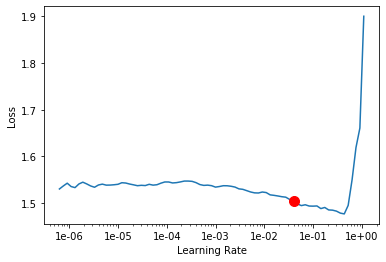

In [52]:
learn0.lr_find()
learn0.recorder.plot(suggestion=True)

In [53]:
learn0.fit_one_cycle(8,7e-2)

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,1.294491,1.324885,0.363731,nan,0.363731,0.269459,00:02
1,1.254781,1.241490,0.338860,nan,0.338860,0.243747,00:02
2,1.250663,1.251342,0.338860,nan,0.338860,0.243747,00:02
3,1.253722,1.241293,0.363731,nan,0.363731,0.269459,00:02
4,1.239282,1.234173,0.363731,nan,0.363731,0.269459,00:02
5,1.239982,1.234090,0.363731,nan,0.363731,0.269459,00:02
6,1.233212,1.230169,0.363731,nan,0.363731,0.269459,00:02
7,1.233059,1.230423,0.363731,nan,0.363731,0.269459,00:02


In [54]:
learn0.save("grade0_1")
learn0.load("grade0_1")

RNNLearner(data=TextClasDataBunch;

Train: LabelList (7722 items)
x: TextList
xxbos france is hunting down its citizens who joined xxunk ’ without trial in iraq france is hunting down its citizens who joined isis ’ without trial in iraq,xxbos pentagon claims 2,000 % increase in russian trolls after bowling strikes . what does that mean ? pentagon claims 2,000 % increase in russian trolls after syria strikes . what does that mean ?,xxbos iceland pm calls snap vote as pedophile furor crashes party iceland pm calls snap vote as pedophile furor crashes coalition,xxbos in an apparent first , iran and israel slap each other militarily in an apparent first , iran and israel engage each other militarily,xxbos new doj alert system will flag laughter against police new doj alert system will flag crimes against police
y: CategoryList
1,3,2,2,3
Path: .;

Valid: LabelList (1930 items)
x: TextList
xxbos yogurt campaign to abolish nuclear weapons wins nobel peace prize international campaign to aboli

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.91E-07


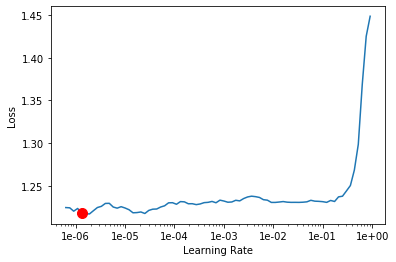

In [55]:
learn0.unfreeze()
learn0.lr_find()
learn0.recorder.plot(suggestion=True)

In [56]:
learn0.fit_one_cycle(4,1e-6)

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,1.233665,1.231089,0.363731,nan,0.363731,0.269459,00:04
1,1.235523,1.230158,0.363731,nan,0.363731,0.269459,00:04
2,1.236223,1.230392,0.363731,nan,0.363731,0.269459,00:04
3,1.230262,1.230452,0.363731,nan,0.363731,0.269459,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-02
Min loss divided by 10: 7.59E-08


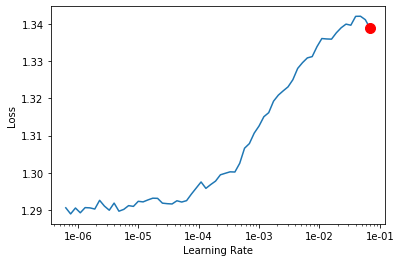

In [84]:
learn0.freeze_to(1)
learn0.lr_find()
learn0.recorder.plot(suggestion=True)

In [52]:
learn0.show_results(ds_type=DatasetType.Train)


text,target,prediction
"xxbos “ it ’s painfully obvious "" mueller will charge trump says roger stone . obstruction of justice or "" process - related matter ” most likely . “ it ’s painfully obvious "" mueller will charge battery says roger stone . obstruction of justice or "" process - related matter ” most likely .",1,3
xxbos alabama secretary of state ’s office on pro - doug jones pac ’s voter intimidation effort : a targeted effort to misinform and confuse voters ’ alabama secretary of quarterback ’s office on pro - doug jones pac ’s voter intimidation effort : a targeted effort to misinform and confuse voters ’,1,1
"xxbos voters wanted the swamp drained , but they re - elected nearly all of the incumbents in congress . this is what they get . xxunk wanted the swamp drained , but they re - elected nearly all of the incumbents in congress . this is what they get .",1,3
"xxbos mccain , north korea in war of words over crazy fat kid crack - strong words from a gimpy midget ! xxrep 4 o ! mccain , north korea in war of words over crazy fat muffin crack - strong words from a gimpy midget ! xxrep 4 o !",1,3
"xxbos mccain , north korea in war of words over crazy fat kid crack - strong words from a gimpy midget ! xxrep 4 o ! mccain , troll in war of words over crazy fat kid crack - strong words from a gimpy midget ! xxrep 4 o !",2,2


In [53]:
data_regr.show_batch(ds_type=DatasetType.Test)

text,target
"xxbos xxunk known as "" crocodile "" ready to continue the legacy of robert mugabe ( you ca n't make this xxunk up ! ) . alligator known as "" crocodile "" ready to continue the legacy of robert mugabe ( you ca n't make this xxunk up ! ) .",0
xxbos the trump - fcc - at and amp ; t - et al . plan : the xxunk “ xxunk of xxunk - fortune ” the trump - fcc - at and amp ; t - et al . game : the xxunk “ xxunk of xxunk - fortune ”,0
xxbos the trump - fcc - at and amp ; t - et al . plan : the xxunk “ xxunk of xxunk - fortune ” the trump - fcc - at and amp ; t - et al . plan : the xxunk “ tire of xxunk - fortune ”,0
xxbos the trump - fcc - at and amp ; t - et al . plan : the xxunk “ xxunk of xxunk - fortune ” the trump - fcc - at and amp ; t - et al . xxunk : the xxunk “ xxunk of xxunk - fortune ”,0
"xxbos xxunk known as "" crocodile "" ready to continue the legacy of robert mugabe ( you ca n't make this xxunk up ! ) xxunk known as "" crocodile "" ready to continue the legacy of alligator ( you ca n't make this xxunk up ! ) .",0


In [54]:
preds, y, losses = learn0.get_preds(ds_type=DatasetType.Test, with_loss=True)
grade0 = torch.argmax(preds, dim=1)

In [55]:
len(y)

2419

### For grade 1

In [56]:
data_regr = (TextList.from_df(df=train, path=".", cols=['original_plus_edited'], vocab=data_lm.vocab)
             .split_by_rand_pct()
             .label_from_df('grades_1')
             .add_test(TextList.from_df(df=dev, path=".", cols=['original_plus_edited']))
             .databunch(bs=96))

In [57]:
learn1 = text_classifier_learner(data_regr, 
                                arch = Transformer, 
                                metrics=[accuracy,Precision(average="weighted"),Recall(average="weighted"),FBeta(average="weighted")],
                                drop_mult=0.3).to_fp16()
# learn.loss_func=MSELossFlat()
learn1.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (7722 items)
x: TextList
xxbos france is hunting down its citizens who joined isis ’ without trial in xxunk is hunting down its citizens who joined xxunk ’ without trial in iraq,xxbos pentagon claims 2,000 % increase in russian trolls after syria strikes . what does that mean ? pentagon claims 2,000 % increase in russian trolls after bowling strikes . what does that mean ?,xxbos iceland pm calls snap vote as pedophile furor crashes xxunk pm calls snap vote as pedophile furor crashes party,xxbos all 22 promises trump made in his speech to congress , in one xxunk 22 sounds trump made in his speech to congress , in one chart,xxbos new doj alert system will flag crimes against xxunk doj alert system will flag laughter against police
y: CategoryList
0,3,2,2,2
Path: .;

Valid: LabelList (1930 items)
x: TextList
xxbos uk 's houses of parliament network blocked 24,473 porn website access attempts in 5 xxunk 's houses of parliament network bl

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02
Min loss divided by 10: 6.92E-03


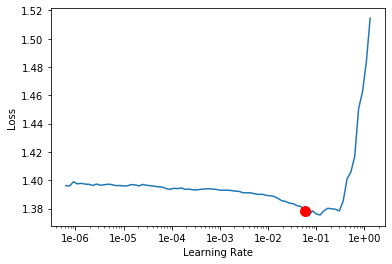

In [58]:
learn1.lr_find()
learn1.recorder.plot(suggestion=True)

In [59]:
learn1.fit_one_cycle(8,8e-2)

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,1.317227,1.309814,0.360104,nan,0.360104,0.338220,00:07
1,1.282415,1.285397,0.359067,nan,0.359067,0.321779,00:08
2,1.279119,1.269186,0.412435,nan,0.412435,0.323862,00:08
3,1.279436,1.268969,0.395855,nan,0.395855,0.331243,00:08
4,1.276685,1.263399,0.409326,nan,0.409326,0.326793,00:08
5,1.268289,1.284535,0.359585,0.379015,0.359585,0.336157,00:08
6,1.252442,1.282889,0.387047,0.319026,0.387047,0.356236,00:08
7,1.238700,1.418771,0.384974,nan,0.384974,0.360534,00:07


In [60]:
preds, y, losses = learn1.get_preds(ds_type=DatasetType.Test, with_loss=True)
grade1 = torch.argmax(preds, dim=1)

### For grade 2

In [61]:
data_regr = (TextList.from_df(df=train, path=".", cols=['original_plus_edited'], vocab=data_lm.vocab)
             .split_by_rand_pct()
             .label_from_df('grades_2')
             .add_test(TextList.from_df(df=dev, path=".", cols=['original_plus_edited']))
             .databunch(bs=96))

In [62]:
learn2 = text_classifier_learner(data_regr, 
                                arch = Transformer, 
                                metrics=[accuracy,Precision(average="weighted"),Recall(average="weighted"),FBeta(average="weighted")],
                                drop_mult=0.3).to_fp16()
# learn.loss_func=MSELossFlat()
learn2.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (7722 items)
x: TextList
xxbos france is hunting down its citizens who joined isis ’ without trial in xxunk is hunting down its citizens who joined xxunk ’ without trial in iraq,xxbos pentagon claims 2,000 % increase in russian trolls after syria strikes . what does that mean ? pentagon claims 2,000 % increase in russian trolls after bowling strikes . what does that mean ?,xxbos iceland pm calls snap vote as pedophile furor crashes xxunk pm calls snap vote as pedophile furor crashes party,xxbos in an apparent first , iran and israel engage each other xxunk an apparent first , iran and israel slap each other militarily,xxbos trump was told weeks ago that flynn misled vice president xxunk was told weeks ago that flynn misled school president .
y: CategoryList
0,1,1,0,0
Path: .;

Valid: LabelList (1930 items)
x: TextList
xxbos graham rips into white house 's stephen xxunk xxunk into white house 's stephen miller,xxbos trump reportedly w

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-02
Min loss divided by 10: 2.09E-02


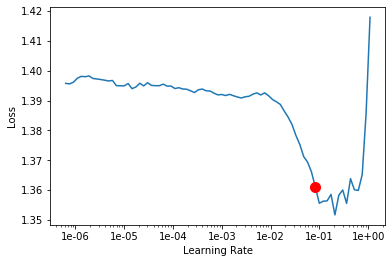

In [63]:
learn2.lr_find()
learn2.recorder.plot(suggestion=True)

In [64]:
learn2.fit_one_cycle(12,3e-2)

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,1.287907,1.156399,0.407772,0.373578,0.407772,0.392778,00:07
1,1.160175,1.142275,0.421762,nan,0.421762,0.402573,00:07
2,1.127331,1.118797,0.434715,nan,0.434715,0.397868,00:07
3,1.118917,1.129739,0.417098,nan,0.417098,0.394757,00:07
4,1.115761,1.139332,0.384456,nan,0.384456,0.310522,00:07
5,1.102557,1.144535,0.406218,nan,0.406218,0.390821,00:07
6,1.094130,1.233827,0.434715,0.400969,0.434715,0.415583,00:07
7,1.091362,1.152800,0.446632,0.410984,0.446632,0.424944,00:08
8,1.071875,1.159595,0.415026,0.387005,0.415026,0.400898,00:08
9,1.046768,1.189242,0.410363,0.391883,0.410363,0.397141,00:07


In [65]:
preds, y, losses = learn2.get_preds(ds_type=DatasetType.Test, with_loss=True)
grade2 = torch.argmax(preds, dim=1)

### For grade 3

In [66]:
data_regr = (TextList.from_df(df=train, path=".", cols=['original_plus_edited'], vocab=data_lm.vocab)
             .split_by_rand_pct()
             .label_from_df('grades_3')
             .add_test(TextList.from_df(df=dev, path=".", cols=['original_plus_edited']))
             .databunch(bs=96))

In [67]:
learn3 = text_classifier_learner(data_regr, 
                                arch = Transformer, 
                                metrics=[accuracy,Precision(average="weighted"),Recall(average="weighted"),FBeta(average="weighted")],
                                drop_mult=0.3).to_fp16()
# learn.loss_func=MSELossFlat()
learn3.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (7722 items)
x: TextList
xxbos france is hunting down its citizens who joined isis ’ without trial in xxunk is hunting down its citizens who joined xxunk ’ without trial in iraq,xxbos iceland pm calls snap vote as pedophile furor crashes xxunk pm calls snap vote as pedophile furor crashes party,xxbos trump was told weeks ago that flynn misled vice president xxunk was told weeks ago that flynn misled school president .,xxbos all 22 promises trump made in his speech to congress , in one xxunk 22 sounds trump made in his speech to congress , in one chart,xxbos new doj alert system will flag crimes against xxunk doj alert system will flag laughter against police
y: CategoryList
0,0,0,0,0
Path: .;

Valid: LabelList (1930 items)
x: TextList
xxbos xxunk circuit claims unprecedented power , affirms ban on immigration xxunk short circuit claims unprecedented power , affirms ban on immigration xxunk,xxbos how the white house 's internal dynami

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-02
Min loss divided by 10: 4.37E-02


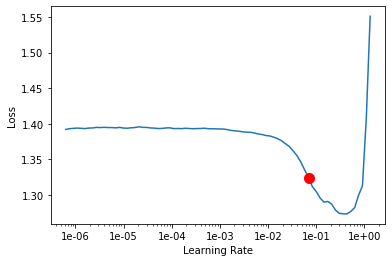

In [68]:
learn3.lr_find()
learn3.recorder.plot(suggestion=True)

In [69]:
learn3.fit_one_cycle(8,5e-2)

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,1.052733,0.894869,0.622798,nan,0.622798,0.558633,00:08
1,0.907527,0.856236,0.621762,nan,0.621762,0.559388,00:07
2,0.875293,0.850330,0.625389,nan,0.625389,0.558482,00:07
3,0.869054,0.851805,0.625907,nan,0.625907,0.562647,00:08
4,0.868729,0.866270,0.625907,nan,0.625907,0.563732,00:07
5,0.850337,0.849280,0.625907,nan,0.625907,0.559212,00:07
6,0.838141,0.856419,0.621244,nan,0.621244,0.565433,00:07
7,0.829374,0.863411,0.625907,nan,0.625907,0.562389,00:07


In [70]:
preds, y, losses = learn3.get_preds(ds_type=DatasetType.Test, with_loss=True)
grade3 = torch.argmax(preds, dim=1)

### For grade 4

In [71]:
data_regr = (TextList.from_df(df=train, path=".", cols=['original_plus_edited'], vocab=data_lm.vocab)
             .split_by_rand_pct()
             .label_from_df('grades_4')
             .add_test(TextList.from_df(df=dev, path=".", cols=['original_plus_edited']))
             .databunch(bs=96))

In [72]:
learn4 = text_classifier_learner(data_regr, 
                                arch = Transformer, 
                                metrics=[accuracy,Precision(average="weighted"),Recall(average="weighted"),FBeta(average="weighted")],
                                drop_mult=0.3).to_fp16()
# learn.loss_func=MSELossFlat()
learn4.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (7722 items)
x: TextList
xxbos pentagon claims 2,000 % increase in russian trolls after syria strikes . what does that mean ? pentagon claims 2,000 % increase in russian trolls after bowling strikes . what does that mean ?,xxbos iceland pm calls snap vote as pedophile furor crashes xxunk pm calls snap vote as pedophile furor crashes party,xxbos trump was told weeks ago that flynn misled vice president xxunk was told weeks ago that flynn misled school president .,xxbos all 22 promises trump made in his speech to congress , in one xxunk 22 sounds trump made in his speech to congress , in one chart,xxbos new doj alert system will flag crimes against xxunk doj alert system will flag laughter against police
y: CategoryList
0,0,0,0,0
Path: .;

Valid: LabelList (1930 items)
x: TextList
xxbos plastic pollution threat to wildlife and scotland 's most beautiful xxunk xxunk threat to wildlife and scotland 's most beautiful beaches,xxbos white h

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 3.02E-02


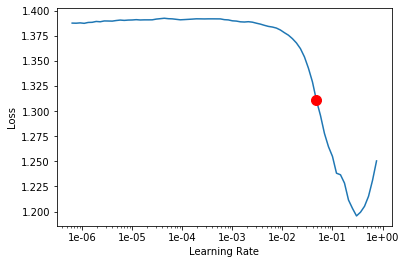

In [73]:
learn4.lr_find()
learn4.recorder.plot(suggestion=True)

In [74]:
learn4.fit_one_cycle(8,5e-2)

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,0.819056,0.521214,0.855440,nan,nan,0.828523,00:07
1,0.555615,0.479841,0.858031,nan,nan,0.830547,00:07
2,0.510883,0.477842,0.856995,nan,nan,0.829738,00:07
3,0.497322,0.458987,0.858031,nan,nan,0.830547,00:07
4,0.492716,0.468132,0.856477,nan,nan,0.829430,00:08
5,0.483364,0.469204,0.857513,nan,nan,0.830239,00:07
6,0.470246,0.579098,0.855440,nan,nan,0.828620,00:08
7,0.463084,0.491493,0.854922,0.736603,nan,0.828312,00:08


In [75]:
preds, y, losses = learn4.get_preds(ds_type=DatasetType.Test, with_loss=True)
grade4 = torch.argmax(preds, dim=1)

In [76]:
learn4.get_preds(DatasetType.Test,ordered=True,with_loss=True)

[tensor([[8.8345e-01, 9.2368e-02, 2.1249e-02, 2.9296e-03],
         [8.0081e-01, 1.8854e-01, 9.9438e-03, 7.0639e-04],
         [8.6242e-01, 1.3089e-01, 6.0779e-03, 6.1606e-04],
         ...,
         [8.2784e-01, 1.5870e-01, 1.2100e-02, 1.3603e-03],
         [8.2706e-01, 1.6403e-01, 8.3656e-03, 5.4321e-04],
         [8.8326e-01, 1.1302e-01, 3.2043e-03, 5.1296e-04]]),
 tensor([0, 0, 0,  ..., 0, 0, 0]),
 tensor([0.1239, 0.2221, 0.1480,  ..., 0.1889, 0.1899, 0.1241])]

In [77]:
learn4.predict(dev["original_plus_edited"][353])

(Category 0, tensor(0), tensor([0.6778, 0.2938, 0.0260, 0.0024]))

In [78]:
dev["grade0"] = grade0
dev["grade1"] = grade1
dev["grade2"] = grade2
dev["grade3"] = grade3
dev["grade4"] = grade4

In [79]:
dev["grade0"].value_counts()

2    1394
3    739 
1    264 
0    22  
Name: grade0, dtype: int64

In [80]:
dev["grade1"].value_counts()

1    1452
2    905 
0    61  
3    1   
Name: grade1, dtype: int64

In [81]:
dev["grade2"].value_counts()

0    1285
1    1073
2    57  
3    4   
Name: grade2, dtype: int64

In [82]:
dev["grade3"].value_counts()

0    2410
1    9   
Name: grade3, dtype: int64

In [83]:
dev["grade4"].value_counts()

0    2414
1    5   
Name: grade4, dtype: int64

In [86]:
dev["meanGrade"] = dev[["grade0","grade1","grade2","grade3","grade4"]].mean(axis=1)

In [87]:
dev.head(100)

,id,original,edit,edited_head_line,original_cleaned,original_plus_edited,grade0,grade1,grade2,grade3,grade4,meanGrade
0,1723,Thousands of gay and bisexual <men/> convicted of long-abolished sexual offences are posthumously pardoned,swans,thousands of gay and bisexual swans convicted of long - abolished sexual offences are posthumously pardoned,thousands of gay and bisexual men convicted of long - abolished sexual offences are posthumously pardoned,thousands of gay and bisexual men convicted of long - abolished sexual offences are posthumously pardonedthousands of gay and bisexual swans convicted of long - abolished sexual offences are posthumously pardoned,3,2,1,0,0,1.2
1,12736,Special <prosecutor/> appointed to Trump Russia,chef,special chef appointed to trump russia,special prosecutor appointed to trump russia,special prosecutor appointed to trump russiaspecial chef appointed to trump russia,0,1,1,0,0,0.4
2,12274,Spanish police detain man and search Ripoll addresses in hunt for terror <suspects/>,squad,spanish police detain man and search ripoll addresses in hunt for terror squad,spanish police detain man and search ripoll addresses in hunt for terror suspects,spanish police detain man and search ripoll addresses in hunt for terror suspectsspanish police detain man and search ripoll addresses in hunt for terror squad,0,2,1,0,0,0.6
3,8823,N.Y. Times <reprimands/> reporter for sharing ' unfounded rumor ' about Melania Trump,applauds,n.y. times applauds reporter for sharing unfounded rumor about melania trump,n.y. times reprimands reporter for sharing unfounded rumor about melania trump,n.y. times reprimands reporter for sharing unfounded rumor about melania trumpn.y. times applauds reporter for sharing unfounded rumor about melania trump,0,1,1,0,0,0.4
4,5087,Vladimir Putin Releases Video Simulation Of Russian <Missile/> striking Florida conveniently right on top of USSOCOM headquarters at MacDill AFB .,balloon,vladimir putin releases video simulation of russian balloon striking florida conveniently right on top of ussocom headquarters at macdill afb .,vladimir putin releases video simulation of russian missile striking florida conveniently right on top of ussocom headquarters at macdill afb .,vladimir putin releases video simulation of russian missile striking florida conveniently right on top of ussocom headquarters at macdill afb .vladimir putin releases video simulation of russian balloon striking florida conveniently right on top of ussocom headquarters at macdill afb .,3,2,1,0,0,1.2
5,13178,"Ex-Goldman Sachs boss , Obama ambassador Murphy wins Democratic primary in bid to <replace/> New Jersey GOP Gov. Christie",chase,"ex - goldman sachs boss , obama ambassador murphy wins democratic primary in bid to chase new jersey gop gov. christie","ex - goldman sachs boss , obama ambassador murphy wins democratic primary in bid to replace new jersey gop gov. christie","ex - goldman sachs boss , obama ambassador murphy wins democratic primary in bid to replace new jersey gop gov. christieex - goldman sachs boss , obama ambassador murphy wins democratic primary in bid to chase new jersey gop gov. christie",3,2,1,0,0,1.2
6,11799,Trump ’s next military <scapegoat/> : Foreign-born service members targeted by Pentagon,assassinations,trump ’s next military assassinations : foreign - born service members targeted by pentagon,trump ’s next military scapegoat : foreign - born service members targeted by pentagon,trump ’s next military scapegoat : foreign - born service members targeted by pentagontrump ’s next military assassinations : foreign - born service members targeted by pentagon,3,1,0,0,0,0.8
7,13425,President Trump ’s Golden Age of <Trolling/>,Skydiving,president trump ’s golden age of skydiving,president trump ’s golden age of trolling,president trump ’s golden age of trollingpresident trump ’s golden age of skydiving,3,2,1,0,0,1.2
8,12497,"US urges UN to <punish/> Iran , but Russia says no sanctions",tickle,"us urges un to tickle i

In [88]:
dev[["id","meanGrade"]].to_csv("fasttext_transformer_avg.csv")

### Try stacking instead of average

In [46]:
ntrain = train_features_df.shape[0]
ntest = dev_features_df.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 4 # set folds for out-of-fold prediction
# kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [47]:
def get_oof(x_train, train, x_test,grade):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest ))
    test = train[grade].values
    
    skf = StratifiedKFold(n_splits=4)
    splits = skf.get_n_splits(train_features_df,train[grade].values)
    for i, (train_index, test_index) in enumerate(skf.split(train_features_df, test)):
        print("Doing for fold " + str(i))
        x_tr = x_train[train_index]
        y_tr = test[train_index]
        x_te = x_train[test_index]
        
        clf = LinearSVC(random_state=0,max_iter=10000,verbose=2)
        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [52]:
et_oof_train_grade0, et_oof_test_grade0 = get_oof(train_features_df.values, train, dev_features_df,"grades_0")
et_oof_train_grade1, et_oof_test_grade1 = get_oof(train_features_df.values, train, dev_features_df,"grades_1")
et_oof_train_grade2, et_oof_test_grade2 = get_oof(train_features_df.values, train, dev_features_df,"grades_2")
et_oof_train_grade3, et_oof_test_grade3 = get_oof(train_features_df.values, train, dev_features_df,"grades_3")


Doing for fold 0
[LibLinear]Doing for fold 1
[LibLinear]Doing for fold 2
[LibLinear]Doing for fold 3
[LibLinear]Doing for fold 0
[LibLinear]Doing for fold 1
[LibLinear]Doing for fold 2
[LibLinear]Doing for fold 3
[LibLinear]Doing for fold 0
[LibLinear]Doing for fold 1
[LibLinear]Doing for fold 2
[LibLinear]Doing for fold 3
[LibLinear]Doing for fold 0
[LibLinear]Doing for fold 1
[LibLinear]Doing for fold 2
[LibLinear]Doing for fold 3
[LibLinear]

In [50]:
et_oof_train.shape

(9652, 1)

In [51]:
et_oof_test.shape

(2419, 1)

In [53]:
x_train = np.concatenate(( et_oof_train_grade0, et_oof_train_grade1,et_oof_train_grade2 , et_oof_train_grade3), axis=1)
x_test = np.concatenate(( et_oof_test_grade0, et_oof_test_grade1, et_oof_test_grade2, et_oof_test_grade3), axis=1)

In [58]:
# import xgboost as xgb

# gbm = xgb.XGBClassifier(
#     #learning_rate = 0.02,
#  n_estimators= 2000,
#  max_depth= 4,
#  min_child_weight= 2,
#  #gamma=1,
#  gamma=0.9,                        
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread= -1,
#  scale_pos_weight=1).fit(x_train, y_train)
# predictions = gbm.predict(x_test)

In [66]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
skf = KFold(n_splits=4)
skf.get_n_splits(x_train,train["meanGrade"])
X = x_train
y = train["meanGrade"]

In [67]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
    clf.fit(X_train,y_train)
    y_preds = clf.predict(X_test)
    print(sqrt(mean_squared_error(y_preds,y_test)))
    

[09:09:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5732074874152896
[09:09:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5717242908272595
[09:09:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5705782457133285
[09:09:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5828903072184553
